# Tools set up

In [1]:
# All modules use for this project
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sb
pd.options.display.max_columns = 200
%matplotlib inline
import matplotlib.pyplot as plt

   # Project Introduction

Alfred Nobel was a Swedish chemist, engineer, and industrialist most known for his dynamite invention. He died in 1896. It is believed that when he died, his fortune was (roughly estimated) $200 million. In his will, he wants to contribute all of the remaining assets to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind.”

source: https://en.wikipedia.org/wiki/Nobel_Prize

<img src="Nobel-Prize.jpeg" style="width:690px;height:400px"/>

# Web Scraping Data

We will use BeautifulSoup to decode an HTML web page. We want to scrape the facts of Nobel prize.

# Nobel Prize Facts

**Task**:
* Get the highlighted titles(main titles) on the web.
* Get the information below it.
* Print out the titles, followed by the information under it.

In [2]:
# let's grab some information about nobel prize from a web page
nobelPrizeHTML = requests.get("https://www.nobelprize.org/prizes/facts/nobel-prize-facts/").text

In [3]:
# turn HTML into BeautifulSoup
nobelPrizeSoup = BeautifulSoup(nobelPrizeHTML,"html")
# html is the parser

In [4]:
# check data type
type(nobelPrizeSoup)

bs4.BeautifulSoup

In [5]:
allTags = nobelPrizeSoup.find_all()

In [6]:
len(allTags)

1098

In [7]:
# scrape through all the tags
allTags

[<html class="no-js" lang="en-US">
 <head>
 <meta charset="utf-8"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <link as="font" crossorigin="anonymous" href="https://www.nobelprize.org/wp-content/themes/nobelprize/assets/fonts/ivar/AlfredSerifText-Regular.woff2" rel="preload" type="font/woff2"/>
 <link as="font" crossorigin="anonymous" href="https://www.nobelprize.org/wp-content/themes/nobelprize/assets/fonts/alfred/AlfredSans-Regular.woff2" rel="preload" type="font/woff2"/>
 <link href="http://gmpg.org/xfn/11" rel="profile"/>
 <script>(function(html){html.className = html.className.replace(/\bno-js\b/,'js')})(document.documentElement);</script>
 <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
 <title>NobelPrize.org</title>
 <meta content="en_US" property="og:locale"/>
 <meta content="website" property="og:type"/>
 <meta content="NobelPrize.org" property="og:site_name"/>
 <meta content="summary_lar

In [8]:
# Find all the h2 tags, because it contains all the highlighted titles
h2InfoTag = nobelPrizeSoup.find_all("h2")
h2InfoTag

[<h2>615 Nobel Prizes</h2>,
 <h2>989 Nobel Prize laureates</h2>,
 <h2>Years without Nobel Prizes</h2>,
 <h2>Nobel Prize laureates and affiliation</h2>,
 <h2>The youngest Nobel Prize laureates</h2>,
 <h2>The oldest Nobel Prize laureates</h2>,
 <h2>61 Nobel Prizes to women</h2>,
 <h2></h2>,
 <h2>Two Nobel Prize laureates declined the prize</h2>,
 <h2>Forced to decline the Nobel Prize</h2>,
 <h2>Nobel Prize laureates under arrest at the time of the award</h2>,
 <h2 id="multiple">Multiple Nobel Prize laureates</h2>,
 <h2>Posthumous Nobel Prizes</h2>,
 <h2>“Family Nobel Prize laureates”</h2>,
 <h2>The Nobel Prize award ceremonies</h2>,
 <h2>The Nobel Prize insignias</h2>,
 <h2>The Nobel Prize diplomas</h2>,
 <h2></h2>,
 <h2>The Nobel Prize amount</h2>]

In [9]:
print("      ======================================= Topics of the Website =============================================")
print()
for title in nobelPrizeSoup.find_all("h2"):
    print(title.text)

      ======================================= Topics of the Website =============================================

615 Nobel Prizes
989 Nobel Prize laureates
Years without Nobel Prizes
Nobel Prize laureates and affiliation
The youngest Nobel Prize laureates
The oldest Nobel Prize laureates
61 Nobel Prizes to women

Two Nobel Prize laureates declined the prize
Forced to decline the Nobel Prize
Nobel Prize laureates under arrest at the time of the award
Multiple Nobel Prize laureates
Posthumous Nobel Prizes
“Family Nobel Prize laureates”
The Nobel Prize award ceremonies
The Nobel Prize insignias
The Nobel Prize diplomas

The Nobel Prize amount


In [10]:
# display a summary of each topic above
print("      ======================================= Nobel Prize Facts =============================================")
print()

for header in nobelPrizeSoup.find_all("h2"):
    print("--------------------------------------------------------------------------------------------------------")
    print(header.text)
    print("--------------------------------------------------------------------------------------------------------")
    info = header.find_next_sibling("p")
    print("Summary:")
    print(info)
    print()
    
    # Summary:
    # None 
    # means it is a spreadsheet

      ======================================= Nobel Prize Facts =============================================

--------------------------------------------------------------------------------------------------------
615 Nobel Prizes
--------------------------------------------------------------------------------------------------------
Summary:
<p>Between 1901 and 2022, the Nobel Prizes and the prize in economic sciences were awarded 615 times.</p>

--------------------------------------------------------------------------------------------------------
989 Nobel Prize laureates
--------------------------------------------------------------------------------------------------------
Summary:
<p>Nobel Prizes have been awarded to individuals 959 times and organisations 30 times between 1901 and 2022. Of them, 92 were for economic sciences. A small number of individuals and organisations have been honoured more than once, which means that 954 unique individuals and 27 unique organisations h

# Data Exploration

**Objective**:
* Explore csv datatype.
* Making dataframes.
* Display appropriate visuals to convey the audience.

In [11]:
# use pandas to read in the file
# use first csv file: nobel_prize_data.csv
# this data is from the year 1901 to 2020
df_nobelPrizeData = pd.read_csv("nobel_prize_data.csv")

In [12]:
# let's look at the data
df_nobelPrizeData

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [13]:
# let's make new columns
# and look at the data we want
laureateData = df_nobelPrizeData[["year","category","laureate_type","birth_country","sex"]]
laureateData

,year,category,laureate_type,birth_country,sex
0,1901,Chemistry,Individual,Netherlands,Male
1,1901,Literature,Individual,France,Male
2,1901,Medicine,Individual,Prussia (Poland),Male
3,1901,Peace,Individual,France,Male
4,1901,Peace,Individual,Switzerland,Male
...,...,...,...,...,...
957,2020,Medicine,Individual,United Kingdom,Male
958,2020,Peace,Organization,NaN,NaN
959,2020,Physics,Individual,United States of America,Female
960,2020,Physics,Individual,Germany,Male


**Get the correct data from the dataframes and answer these questions**:

Are there more male or female laureates?

In [14]:
laureateData["sex"].value_counts()

Male      876
Female     58
Name: sex, dtype: int64

What country receives the most Nobel prize?

In [15]:
laureateData["birth_country"].value_counts()

United States of America           281
United Kingdom                      91
Germany                             65
France                              54
Sweden                              29
                                  ... 
Russian Empire (Azerbaijan)          1
Bosnia (Bosnia and Herzegovina)      1
Brazil                               1
Guadeloupe Island                    1
Ethiopia                             1
Name: birth_country, Length: 124, dtype: int64

How many countries have received the Nobel prize?

In [16]:
laureateData["birth_country"].nunique()

124

What is the total number of awards received per category?

In [17]:
laureateData["category"].value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

Does an organization receive more Nobel prizes than an individual?

In [18]:
laureateData["laureate_type"].value_counts()

Individual      930
Organization     32
Name: laureate_type, dtype: int64

How many categories are there?

In [19]:
laureateData["category"].nunique()

6

Total awards that are given out each year.

In [17]:
laureateData["year"].value_counts().head(10)

2001    15
2019    14
1996    13
2018    13
2000    13
2005    13
2014    13
2013    13
2002    13
2011    13
Name: year, dtype: int64

In [21]:
laureateData["year"].value_counts().tail(10)

1943    4
1928    4
1917    4
1919    4
1948    4
1915    4
1924    3
1914    3
1918    2
1916    1
Name: year, dtype: int64

In [22]:
# use groupby to group category and year
categoryYear = df_nobelPrizeData.groupby("year").count()
categoryYear["category"].head()

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: category, dtype: int64

In [23]:
categoryYear["category"].tail()

year
2016    11
2017    12
2018    13
2019    14
2020    12
Name: category, dtype: int64

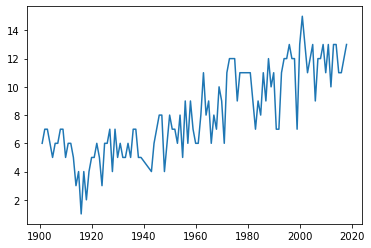

In [24]:
# non-linear line plot
plt.plot(categoryYear.index[:-2],categoryYear.category[:-2])

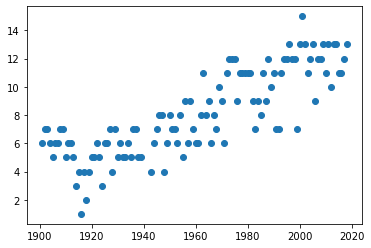

In [25]:
# dot plot
plt.scatter(categoryYear.index[:-2],categoryYear.category[:-2])

In [26]:
categoryYear = df_nobelPrizeData.groupby("year").count().category
#Calculate the 10 year rolling average of the percentage share.
moving_average = categoryYear.rolling(window=10).mean()

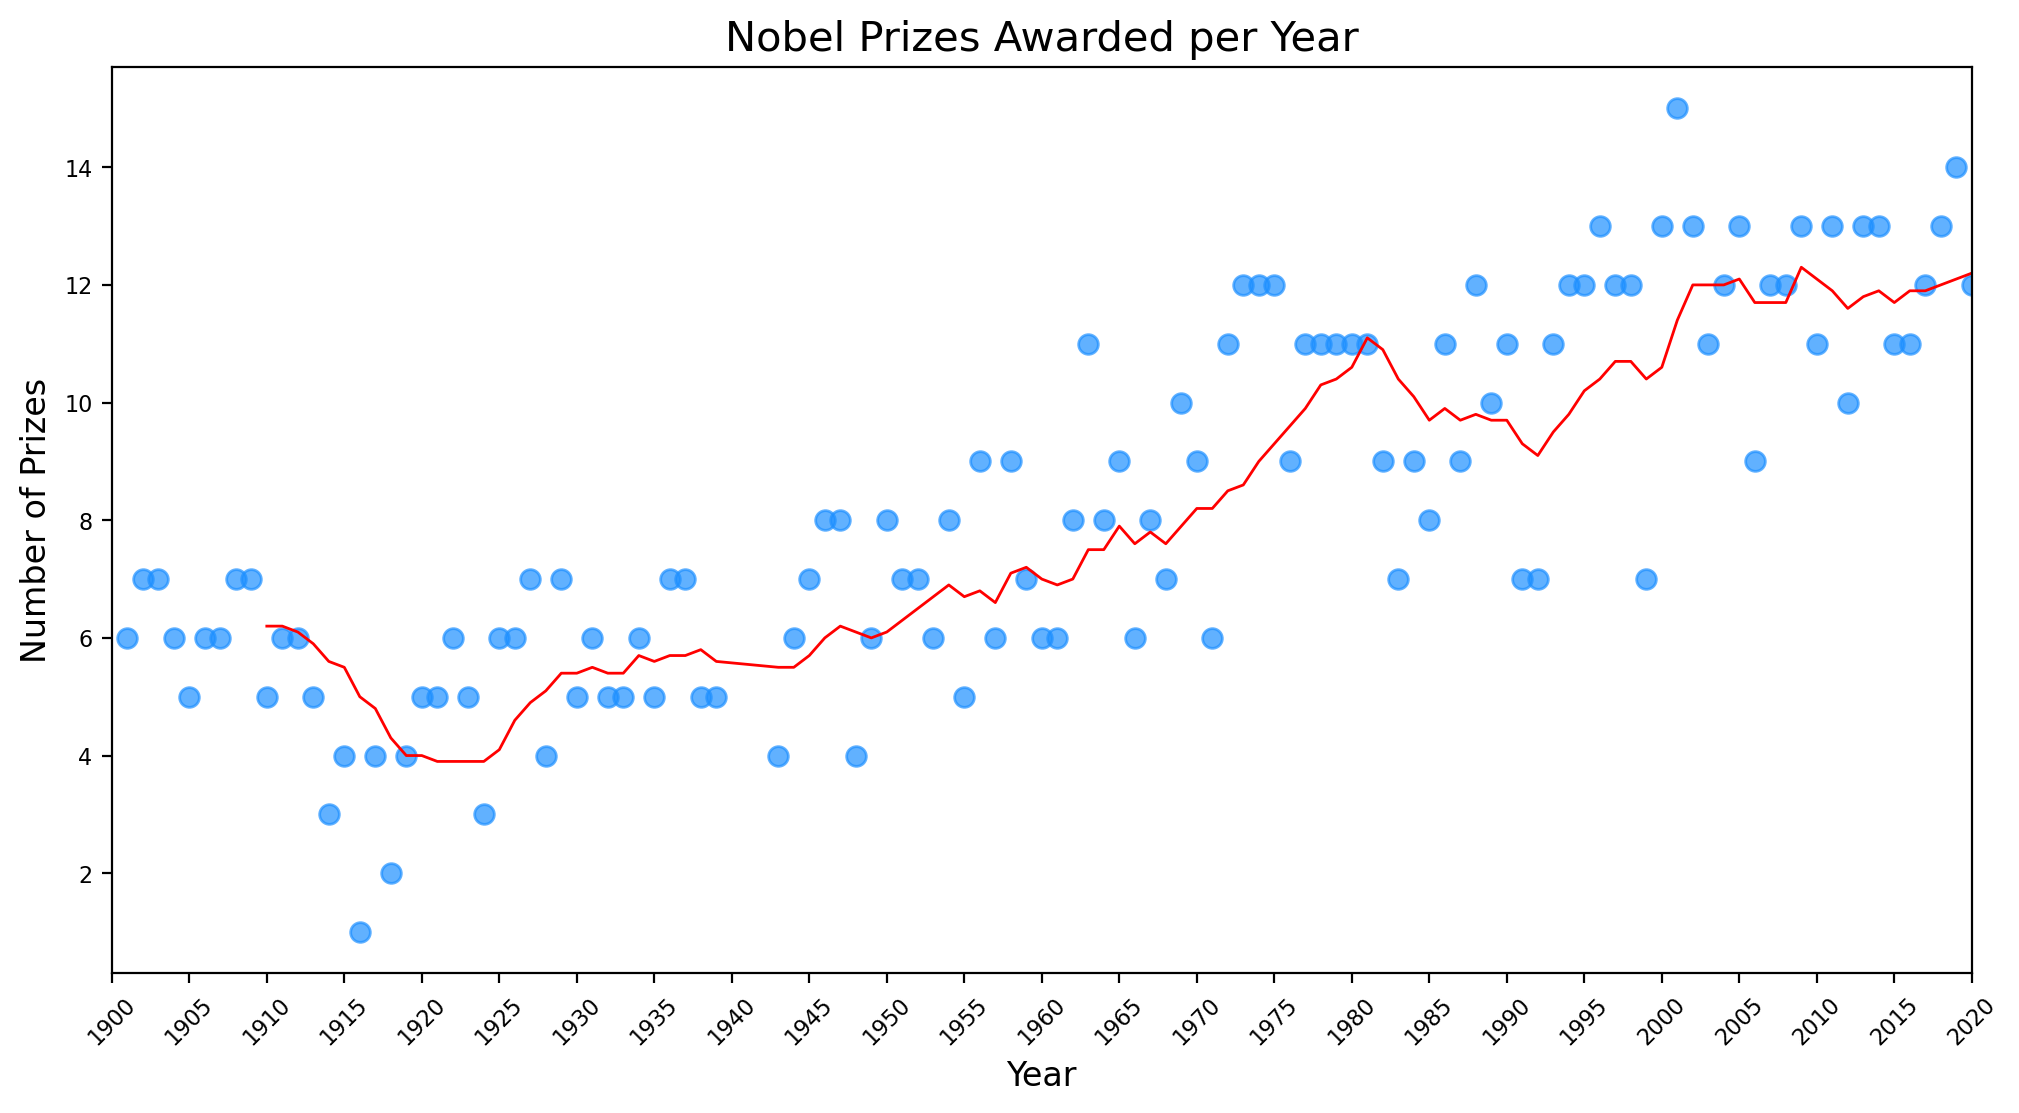

In [27]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Nobel Prizes Awarded per Year', fontsize=15)
plt.yticks(fontsize=8)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=8, 
           rotation=45)

plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Prizes',fontsize=12)

ax = plt.gca()
ax.set_xlim(1900, 2020)
# dot color, clearance
ax.scatter(x=categoryYear.index, 
           y=categoryYear.values, 
           c='dodgerblue',
           alpha=0.7,
           s=50,)
# moving_average line
ax.plot(categoryYear.index, 
        moving_average.values, 
        c='red', 
        linewidth=1,)

plt.show()

In [28]:
# group catogory and gender of the winner
categoryYear = df_nobelPrizeData.groupby("category").count()
categoryYear["sex"].head()

category
Chemistry     186
Economics      86
Literature    117
Medicine      222
Peace         107
Name: sex, dtype: int64

Make an age column and insert it to the table

In [29]:
# Converting birth_date from String to datetime
df_nobelPrizeData['birth_date'] = pd.to_datetime(df_nobelPrizeData["birth_date"])
# Calculating the age of Nobel Prize winners
df_nobelPrizeData['age'] = df_nobelPrizeData["year"] - df_nobelPrizeData["birth_date"].dt.year
df_nobelPrizeData['age']

0      49.0
1      62.0
2      47.0
3      79.0
4      73.0
       ... 
957    71.0
958     NaN
959    55.0
960    68.0
961    89.0
Name: age, Length: 962, dtype: float64

In [30]:
newDFAddAge = df_nobelPrizeData[["year","category","laureate_type","birth_country","sex","age"]]
newDFAddAge

,year,category,laureate_type,birth_country,sex,age
0,1901,Chemistry,Individual,Netherlands,Male,49.0
1,1901,Literature,Individual,France,Male,62.0
2,1901,Medicine,Individual,Prussia (Poland),Male,47.0
3,1901,Peace,Individual,France,Male,79.0
4,1901,Peace,Individual,Switzerland,Male,73.0
...,...,...,...,...,...,...
957,2020,Medicine,Individual,United Kingdom,Male,71.0
958,2020,Peace,Organization,NaN,NaN,NaN
959,2020,Physics,Individual,United States of America,Female,55.0
960,2020,Physics,Individual,Germany,Male,68.0


A density plot is a representation of the distribution of a numeric variable. 
It uses a kernel density estimate to show the probability density function of the variable. 
It is a smoothed version of the histogram and is used in the same concept.

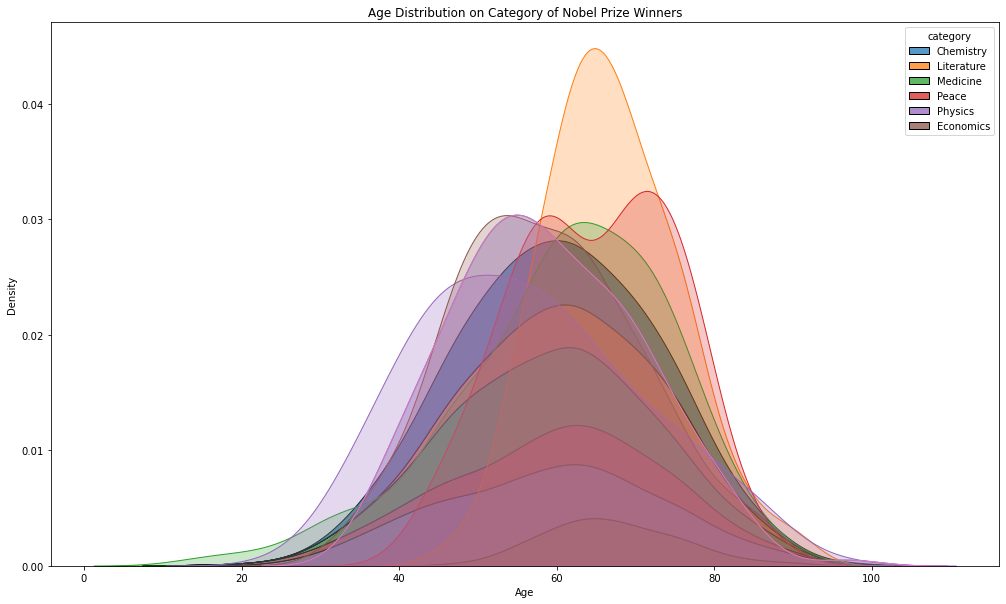

In [31]:
# density plot
plt.figure(figsize=(17, 10))
# using seaborn
# kdeplot is a method to make a density plot
sb.kdeplot(data=newDFAddAge, x="age", hue="category", multiple="stack")
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Chemistry'], label='chemistry', shade=True)
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Economics'], label='economics', shade=True)
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Peace'], label='peace', shade=True)
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Literature'], label='literature', shade=True)
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Physics'], label='physics', shade=True)
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Medicine'], label='medicine', shade=True)
# run this again to make the shade clearer
sb.kdeplot(newDFAddAge.age[newDFAddAge.category == 'Chemistry'], label='chemistry', shade=True)
plt.xlabel('Age')
plt.title('Age Distribution on Category of Nobel Prize Winners')
plt.show()

# New Data Exploration

In [32]:
# let's look at another csv file
# second csv file: nobel_prize_winner.csv
# this data is collected from 1901 to 2019
# this one also include the prize amount

In [33]:
nobelWinner = pd.read_csv("nobel_prize_winner.csv")
nobelWinner
#prize amount is in SEK unit

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,categoryTopMotivation,award_link,id,name,knownName,givenName,familyName,fullName,penName,gender,laureate_link,birth_date,birth_city,birth_cityNow,birth_continent,birth_country,birth_countryNow,birth_locationString,death_date,death_city,death_cityNow,death_continent,death_country,death_countryNow,death_locationString,orgName,nativeName,acronym,org_founded_date,org_founded_city,org_founded_cityNow,org_founded_continent,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,745,A. Michael Spence,A. Michael Spence,A. Michael,Spence,A. Michael Spence,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1943-00-00,"Montclair, NJ","Montclair, NJ",North America,USA,USA,"Montclair, NJ, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,102,Aage N. Bohr,Aage N. Bohr,Aage N.,Bohr,Aage Niels Bohr,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1922-06-19,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",2009-09-08,Copenhagen,Copenhagen,Europe,Denmark,Denmark,"Copenhagen, Denmark",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,779,Aaron Ciechanover,Aaron Ciechanover,Aaron,Ciechanover,Aaron Ciechanover,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1947-10-01,Haifa,Haifa,Asia,British Protectorate of Palestine,Israel,"Haifa, British Protectorate of Palestine (now ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,259,Aaron Klug,Aaron Klug,Aaron,Klug,Aaron Klug,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-08-11,Zelvas,Zelvas,Europe,Lithuania,Lithuania,"Zelvas, Lithuania",2018-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,NaN,https://masterdataapi.nobelprize.org/2/nobelPr...,114,Abdus Salam,Abdus Salam,Abdus,Salam,Abdus Salam,NaN,male,http://masterdataapi.nobelprize.org/2/laureate...,1926-01-29,Jhang Maghiāna,Jhang Maghiāna,Asia,India,Pakistan,"Jhang Maghiāna, India (now Pakistan)",1996-11-21,Oxford,Oxford,Europe,United Kingdom,United Kingdom,"Oxford, United Kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1972,Physics,The Nobel Prize in Physics,1,1/3,480000,3345725,NaN,received,for their jointly developed theory of supercon...,NaN,https://masterdat

In [34]:
highAward = nobelWinner.sort_values("prizeAmount",ascending=False)[["awardYear","category",
                    "prizeAmount","prizeAmountAdjusted","name","gender","birth_date","ind_or_org"]]
highAward.head()

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_date,ind_or_org
0,2001,Economic Sciences,10000000,12295082,A. Michael Spence,male,1943-00-00,Individual
569,2010,Literature,10000000,10819388,Mario Vargas Llosa,male,1936-03-28,Individual
607,2005,Peace,10000000,11711430,Mohamed ElBaradei,male,1942-06-17,Individual
139,2010,Economic Sciences,10000000,10819388,Christopher A. Pissarides,male,1948-02-20,Individual
140,2011,Economic Sciences,10000000,10545557,Christopher A. Sims,male,1942-10-21,Individual


What is the highest prize amount in the US dollar?

In [35]:
highPrizeAward = highAward["prizeAmount"].max()
print("The highest prize award is {:,} SEK".format(highPrizeAward))
# 1 SEK is equivalent to 0.096 dollars
highSekToDollar = int(highAward["prizeAmount"].max() * 0.096)
print("Which is {:,} dollars".format(highSekToDollar))

The highest prize award is 10,000,000 SEK
Which is 960,000 dollars


In [36]:
highAward["prizeAmount"].max()
print(highAward["name"].loc[highAward["prizeAmount"].idxmax()])

A. Michael Spence


In [37]:
littleAward = nobelWinner.sort_values("prizeAmount",ascending=True)[["awardYear","category",
                    "prizeAmount","prizeAmountAdjusted","name","gender","birth_date","ind_or_org"]]
littleAward.head()

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_date,ind_or_org
910,1923,Literature,114935,3169164,William Butler Yeats,male,1865-06-13,Individual
473,1923,Physiology or Medicine,114935,3169164,John Macleod,male,1876-09-06,Individual
262,1923,Physiology or Medicine,114935,3169164,Frederick G. Banting,male,1891-11-14,Individual
274,1923,Chemistry,114935,3169164,Fritz Pregl,male,1869-09-03,Individual
730,1923,Physics,114935,3169164,Robert A. Millikan,male,1868-03-22,Individual


In [38]:
lowPrizeAward = littleAward["prizeAmount"].min()
print("The lowest prize award is {:,} dollars".format(int(lowPrizeAward * 0.096)))

The lowest prize award is 11,033 dollars


In [39]:
littleAward["prizeAmount"].min()
print(littleAward["name"].loc[littleAward["prizeAmount"].idxmin()])

William Butler Yeats


Display the info for an easier read.

In [40]:
print(f"Name: {littleAward['name'][910]}")
print(f"Gender: {littleAward['gender'][910]}")
print(f"DOB: {littleAward['birth_date'][910]}")
print(f"Individual or Organization: {littleAward['ind_or_org'][910]}")
print(f"Category: {littleAward['category'][910]}")
print(f"Award Year: {littleAward['awardYear'][910]}")

Name: William Butler Yeats
Gender: male
DOB: 1865-06-13
Individual or Organization: Individual
Category: Literature
Award Year: 1923


Find the youngest and oldest winner by DOB.

In [41]:
youngestDF = nobelWinner.sort_values("birth_date",ascending=False)[["awardYear","category",
                    "prizeAmount","prizeAmountAdjusted","name","gender","birth_date","ind_or_org"]]
youngestDF.head()

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_date,ind_or_org
562,2014,Peace,8000000,8379888,Malala Yousafzai,female,1997-07-12,Individual
612,2018,Peace,9000000,9000000,Nadia Murad,female,1993-00-00,Individual
846,2011,Peace,10000000,10545557,Tawakkol Karman,female,1979-02-07,Individual
6,2019,Peace,9000000,9000000,Abiy Ahmed Ali,male,1976-08-15,Individual
521,2010,Physics,10000000,10819388,Konstantin Novoselov,male,1974-08-23,Individual


In [42]:
print(f"The youngest Nobel prize winner is {youngestDF['name'][562]}.")

The youngest Nobel prize winner is Malala Yousafzai.


In [43]:
oldestDF = nobelWinner.sort_values("birth_date",ascending=True)[["awardYear","category",
                    "prizeAmount","prizeAmountAdjusted","name","gender","birth_date","ind_or_org"]]
oldestDF.head()

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_date,ind_or_org
850,1902,Literature,141847,8059489,Theodor Mommsen,male,1817-11-30,Individual
260,1901,Peace,150782,8567159,Frédéric Passy,male,1822-05-20,Individual
705,1903,Peace,141358,7795478,Randal Cremer,male,1828-03-18,Individual
360,1901,Peace,150782,8567159,Henry Dunant,male,1828-05-08,Individual
78,1909,Peace,139800,7084459,Auguste Beernaert,male,1829-07-26,Individual


In [44]:
print(f"The oldest Nobel prize winner is {oldestDF['name'][850]}.")

The oldest Nobel prize winner is Theodor Mommsen.


In [45]:
firstAwarded = nobelWinner.sort_values("awardYear",ascending=True)[["awardYear","category",
                    "prizeAmount","prizeAmountAdjusted","name","gender","birth_date","ind_or_org"]]
firstAwarded.head()

,awardYear,category,prizeAmount,prizeAmountAdjusted,name,gender,birth_date,ind_or_org
415,1901,Chemistry,150782,8567159,Jacobus H. van 't Hoff,male,1852-08-30,Individual
836,1901,Literature,150782,8567159,Sully Prudhomme,male,1839-03-16,Individual
260,1901,Peace,150782,8567159,Frédéric Passy,male,1822-05-20,Individual
211,1901,Physiology or Medicine,150782,8567159,Emil von Behring,male,1854-03-15,Individual
901,1901,Physics,150782,8567159,Wilhelm Conrad Röntgen,male,1845-03-27,Individual


In [46]:
print(f"The first Nobel prize award was in {firstAwarded['awardYear'][260]}.")

The first Nobel prize award was in 1901.


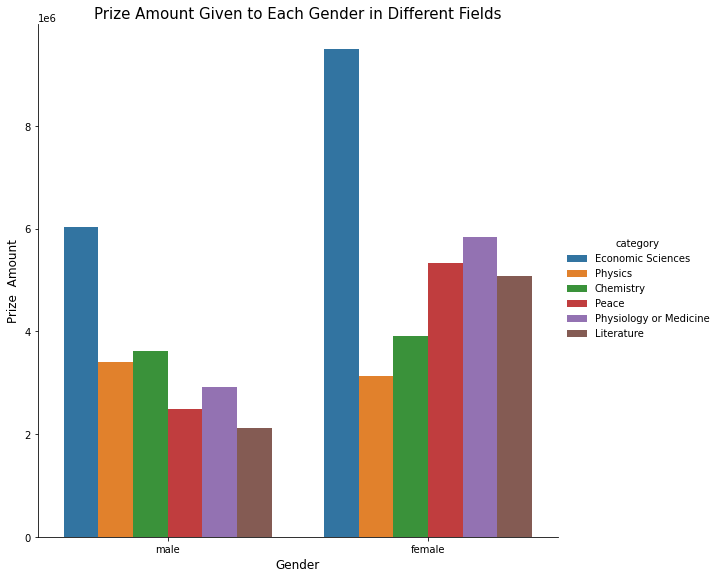

In [47]:
genderPrize = sb.catplot(x="gender",y="prizeAmount",data=nobelWinner,
                                hue="category",kind="bar",height=8,ci=None)
plt.title('Prize Amount Given to Each Gender in Different Fields',fontsize=15)
genderPrize.set_xlabels('Gender', fontsize=12)
genderPrize.set_ylabels('Prize  Amount', fontsize=12)

Look how the prize amount has increased as time passes.

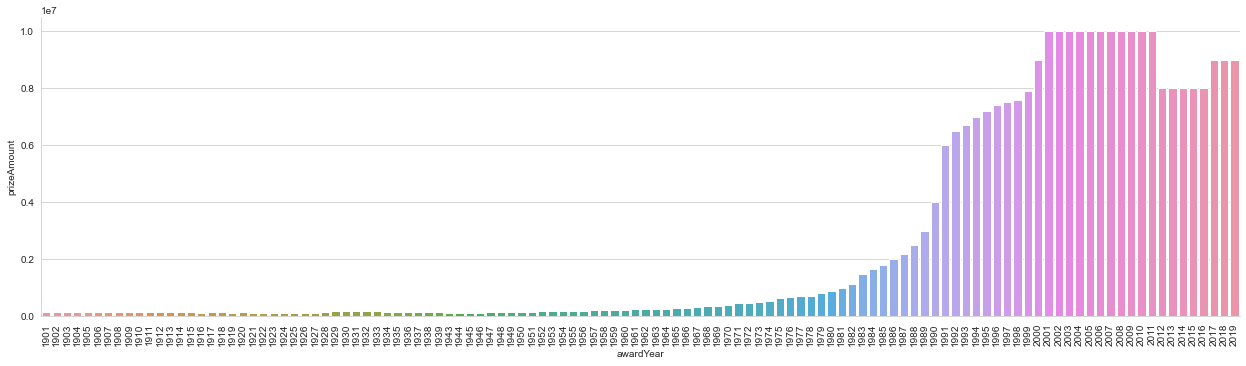

In [48]:
# Reference to week 13 lecture notes
sb.set_style(style="whitegrid")
sb.catplot(x="awardYear",y="prizeAmount",data=nobelWinner,
           kind="bar",aspect=3.5).set_xticklabels(rotation=90)

Learn more about the Nobel Prize at https://www.nobelprize.org/